Projeto Joao Albertino com dados Anatel

Leitura Dataset - Dados :

In [19]:
import pandas as pd

# Caminho do seu arquivo CSV
caminho_csv = 'dadosanatel2025.csv'

def converter_para_numerico(valor):
    """
    Converte valores para numérico tratando diferentes formatos
    """
    if pd.isna(valor):
        return np.nan
    
    # Converte para string
    valor_str = str(valor).strip()
    
    # Remove espaços
    valor_str = valor_str.replace(' ', '')
    
    # Substitui vírgula por ponto
    valor_str = valor_str.replace(',', '.')
    
    # Tenta converter para float
    try:
        return float(valor_str)
    except ValueError:
        return np.nan


# Lê o CSV e cria um DataFrame
df_initial = pd.read_csv(caminho_csv, sep=';')

df_initial['populacao_estimada_numerica'] = df_initial['populacao_estimada'].astype(str).str.replace(',', '.').astype(float)
df_initial['populacao_estimada_numerica2'] = pd.to_numeric(
    df_initial['populacao_estimada'].astype(str).str.replace(',', '.'), 
    errors='coerce'
)
df_initial['populacao_estimada_numerica3'] = df_initial['populacao_estimada'].apply(converter_para_numerico)



# Exibe as 5 primeiras linhas do dataset
print(df_initial.head())



df_upd = df_initial.copy();


   acessos   ano            cnpj  codigo_ibge_municipio  codigo_nacional  \
0        4  2025  40432544000147                2102200               98   
1        1  2025  40432544000147                2906402               75   
2        3  2025  40432544000147                1303403               92   
3        1  2025  40432544000147                3303005               22   
4       18  2025  40432544000147                3116407               34   

   codigo_nacional_chip empresa   grupo_economico  mes modalidade_cobranca  \
0                    31   CLARO  TELECOM AMERICAS    5            Pré-pago   
1                    55   CLARO  TELECOM AMERICAS    5            Pré-pago   
2                    17   CLARO  TELECOM AMERICAS    5            Pós-pago   
3                    88   CLARO  TELECOM AMERICAS    5            Pré-pago   
4                    16   CLARO  TELECOM AMERICAS    5            Pré-pago   

   ...    tipo_pessoa tipo_produto  uf fraude  latitude longitude  \
0  ..

In [20]:
median = df_upd['populacao_estimada_numerica3'].median()
print(median)

44.384


In [21]:
quartiles_vl_remun = df_upd['populacao_estimada_numerica3'].quantile([0.25, 0.5, 0.75 , 0.90])
print("Quartis ':")
print(quartiles_vl_remun)


quartiles_vl_acess = df_upd['acessos'].quantile([0.25, 0.5, 0.75 , 0.90])
print("Quartis Acesso':")
print(quartiles_vl_acess)

Quartis ':
0.25     15.650
0.50     44.384
0.75    171.107
0.90    429.236
Name: populacao_estimada_numerica3, dtype: float64
Quartis Acesso':
0.25     1.0
0.50     3.0
0.75     8.0
0.90    39.0
Name: acessos, dtype: float64


In [22]:
import pandas as pd
import numpy as np

print("Carregando o dataset...")
# Carregar o dataset
df = df_initial.copy()

print(f"Dataset carregado com {len(df)} registros")
print(f"Colunas disponíveis: {list(df.columns)}")

# Verificar se as colunas necessárias existem
required_columns = ['codigo_nacional', 'codigo_nacional_chip', 'acessos', 'fraude']
missing_columns = [col for col in required_columns if col not in df.columns]


# Converter acessos para numérico, tratando valores não numéricos
df['acessos'] = pd.to_numeric(df['acessos'], errors='coerce')


# Verificar cada condição separadamente
condicao1 = (df['codigo_nacional_chip'] != df['codigo_nacional'])
condicao2 = (df['acessos'] > 20)
condicao3 = (df['populacao_estimada_numerica3'] >= 26.24200)

print(f"Condição 1 (códigos diferentes): {condicao1.sum()}")
print(f"Condição 2 (acessos > 20): {condicao2.sum()}")
print(f"Condição 3 (população <= 10.845): {condicao3.sum()}")

# Combinar todas as condições
condicao_fraude = condicao1 & condicao2 & condicao3
# Contar registros que atendem aos critérios
registros_fraude = condicao_fraude.sum()
print(f"Registros que atendem aos critérios de fraude: {registros_fraude}")

# Atualizar o campo fraude
df.loc[condicao_fraude, 'fraude'] = 'S'
df.loc[condicao_fraude == False , 'fraude'] = 'N'

# Contar registros com fraude = 'S' após a atualização
total_fraude = (df['fraude'] == 'S').sum()
print(f"Total de registros com fraude = 'S': {total_fraude}")

# Salvar o dataset atualizado
output_file = 'dados_anatel_2025_updated.csv'
df.to_csv(output_file, index=False)
print(f"Dataset atualizado salvo como: {output_file}")

total_fraude = (df['fraude'] == 'N').sum()
print(f"Total de registros com fraude = 'N': {total_fraude}")

# Mostrar algumas estatísticas
print("\nEstatísticas:")
print(f"Total de registros: {len(df)}")
print(f"Registros com acessos > 20: {(df['acessos'] > 20).sum()}")
print(f"Registros com códigos diferentes: {(df['codigo_nacional_chip'] != df['codigo_nacional']).sum()}")
print(f"Registros com fraude = 'S': {total_fraude}")

# Mostrar alguns exemplos de registros com fraude
if registros_fraude > 0:
    print("\nExemplos de registros com fraude:")
    exemplos = df[condicao_fraude][['codigo_nacional', 'codigo_nacional_chip', 'acessos', 'fraude']].head(5)
    print(exemplos)

df_upd2 = df.copy()


    



Carregando o dataset...
Dataset carregado com 10000 registros
Colunas disponíveis: ['acessos', 'ano', 'cnpj', 'codigo_ibge_municipio', 'codigo_nacional', 'codigo_nacional_chip', 'empresa', 'grupo_economico', 'mes', 'modalidade_cobranca', 'municipio', 'porte_prestadora', 'tecnologia', 'tecnologia_geracao', 'tipo_pessoa', 'tipo_produto', 'uf', 'fraude', 'latitude', 'longitude', 'populacao_estimada', 'populacao_estimada_numerica', 'populacao_estimada_numerica2', 'populacao_estimada_numerica3']
Condição 1 (códigos diferentes): 9023
Condição 2 (acessos > 20): 1455
Condição 3 (população <= 10.845): 6244
Registros que atendem aos critérios de fraude: 707
Total de registros com fraude = 'S': 707
Dataset atualizado salvo como: dados_anatel_2025_updated.csv
Total de registros com fraude = 'N': 9293

Estatísticas:
Total de registros: 10000
Registros com acessos > 20: 1455
Registros com códigos diferentes: 9023
Registros com fraude = 'S': 9293

Exemplos de registros com fraude:
    codigo_nacional

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



X=df_upd2.copy()
X['acessos_por_populacao'] = X['acessos'] / X['populacao_estimada_numerica3']
X['diferenca_codigos'] = abs(X['codigo_nacional'] - X['codigo_nacional_chip'])
X = df_upd2.drop(columns=['fraude', 'codigo_nacional_chip' ,'codigo_nacional' , 'acessos', 'populacao_estimada_numerica3'])
y = df_upd2['fraude']

# ===== CORREÇÃO: Converter 'fraude' para numérico =====
print("=== ANTES DA CONVERSÃO ===")
print("Tipo da coluna fraude:", y.dtype)
print("Valores únicos:", y.unique())

# Converter 'S' para 1 e 'N' para 0
y = y.map({'S': 1, 'N': 0})

print("\n=== APÓS A CONVERSÃO ===")
print("Tipo da coluna fraude:", y.dtype)
print("Valores únicos:", y.unique())

colunas_numericas = ['acessos', 'populacao_estimada_numerica3' , 'ano']
for col in colunas_numericas:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)


# One-Hot Encoding
X = pd.get_dummies(X)
colunas_treino = X.columns.tolist() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===== MODELO COM CLASS_WEIGHT =====
clf = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

# Treinar o modelo
clf.fit(X_train, y_train)
print("Modelo salvo como 'modelo_fraude.joblib'")

# Fazer previsões
y_pred = clf.predict(X_test)

# Obter probabilidades
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Threshold mais baixo = mais sensível
threshold = 0.2  # Detecta mais fraudes
y_pred_sensitive = (y_pred_proba > threshold).astype(int)

print("Acurácia - Ajustado:", accuracy_score(y_test, y_pred_sensitive))

=== ANTES DA CONVERSÃO ===
Tipo da coluna fraude: object
Valores únicos: ['N' 'S']

=== APÓS A CONVERSÃO ===
Tipo da coluna fraude: int64
Valores únicos: [0 1]
Modelo salvo como 'modelo_fraude.joblib'
Acurácia - Ajustado: 0.7933333333333333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump

# 1) Monte X e NÃO perca as features criadas
X = df_upd2.drop(columns=['fraude']) 
X['acessos_por_populacao'] = X['acessos'] / X['populacao_estimada_numerica3']
X['diferenca_codigos'] = (X['codigo_nacional'] - X['codigo_nacional_chip']).abs()

X = X.drop(columns=['codigo_nacional_chip', 'codigo_nacional', 'acessos', 'populacao_estimada_numerica3'])

y = df_upd2['fraude'].map({'S': 1, 'N': 0})

# 3) Conserte tipos numéricos (inclusive 'ano')
colunas_numericas = ['ano']  # as removidas acima não estão mais em X
for col in colunas_numericas:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)

# 4) One-hot das categóricas que restarem
X = pd.get_dummies(X)

# 5) Guarde as colunas do treino para usar na predição
colunas_treino = X.columns.tolist()



# 6) Treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# 7) Salve um BUNDLE com o classificador E a lista de colunas
dump({"clf": clf, "colunas_treino": colunas_treino}, "modelo_fraude2.joblib")

# 8) Métricas
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred_sensitive = (y_proba > 0.2).astype(int)
print("Acurácia - Ajustado:", accuracy_score(y_test, y_pred_sensitive))


Acurácia - Ajustado: 0.9913333333333333


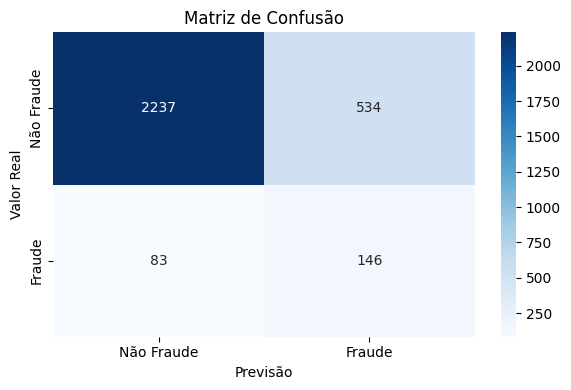

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from joblib import dump
from features import FeatureMaker
import numpy as np

num_cols = ['ano']  
cat_cols = []  


print("=== ANTES DA CONVERSÃO ===")
pre = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="constant", fill_value=0), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder=OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # tudo que sobrar vira dummies
)

pipe = Pipeline(steps=[
    ("feat", FeatureMaker()),
    ("pre", pre),
    ("clf", DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

X = df_upd2.copy()
y = df_upd2['fraude'].map({'S':1, 'N':0})

pipe.fit(X, y)
dump({"pipeline": pipe}, "modelo_fraude2.joblib")

=== ANTES DA CONVERSÃO ===


['modelo_fraude2.joblib']

##JOB LIB